# Stock Clustering using K-Means and Gaussian Mixture Model algorithms

### Clustering stocks by similar performance aids investors in creating sufficiently diversified portfolios.

In [2]:
import numpy as np
from pandas_datareader import data as wb
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas as pd
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import random
import matplotlib.pyplot as plt

random.seed(3456)
plotly.tools.set_credentials_file(username='amurali8', api_key='gkGQLcSnSFYgyUoK8QjB')

In [3]:
#Scraping list of tickers in S&P 500 from Wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies';
raw_data = pd.read_html(url);

In [4]:
#Extracting ticker information
raw_data = raw_data[0]['Symbol']
ticker = raw_data.tolist()

In [5]:
#Extracting adjusted close stock data from 2015-present
stockdata = pd.DataFrame();
for t in ticker:
    try:
        stockdata[t] = wb.DataReader(t,data_source = 'yahoo',start = '2015-01-01')['Adj Close']
    except:
        pass

In [6]:
#Computing simple daily return rate
pct = stockdata.pct_change()

In [7]:
#Computing annualized return and volatility for each stock
ret = pct.mean()*252
std = pct.std()*np.sqrt(252)

In [8]:
#Creating feature dataframe
features = pd.DataFrame(columns = ['Return','Volatility'])
features['Return'] = ret;
features['Volatility'] = std;

In [9]:
X = np.array(features)

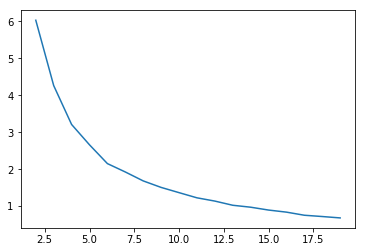

In [10]:
#Finding number of clusters required using an elbow plot
sse = []
for k in range(2,20):
    kmeans = KMeans(n_clusters = k).fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(2,20),sse)
plt.show()
#Breakoff point is probably 6

In [11]:
#K-Means Clustering with n = 6
kmeans = KMeans(n_clusters = 6).fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

trace = go.Scattergl(x = X[:,1], y = X[:,0], mode = 'markers', 
                   marker = dict (size = 14, color = labels, showscale = True)
                  )
data = [trace]

layout = go.Layout(
    
    title=go.layout.Title(
        text=r'$\text{K-Means Clustering for n = 6}$'
    ),
    xaxis=go.layout.XAxis(
        title=r'$\text{Volatility}$'
    ),
    yaxis=go.layout.YAxis(
        title = r'$\text{Expected Return}$'
    )
        
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='kmeans')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [17]:
#Getting rid of outliers
for i in range(0,np.size(np.array(features['Volatility']))):
    if features['Volatility'][i] >= 0.60:
        temp = features.index[i]
        features = features.drop(index = temp)

In [19]:
#Running the algorithm again without the outliers
X = np.array(features)
kmeans = KMeans(n_clusters = 8).fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

trace = go.Scattergl(x = X[:,1], y = X[:,0], mode = 'markers', 
                   marker = dict (size = 14, color = labels, colorscale = 'Viridis', showscale = True)
                  )
data = [trace]

layout = go.Layout(
    
    title=go.layout.Title(
        text=r'$\text{K-Means Clustering for n = 6}$'
    ),
    xaxis=go.layout.XAxis(
        title=r'$\text{Volatility}$'
    ),
    yaxis=go.layout.YAxis(
        title = r'$\text{Expected Return}$'
    )
        
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='kmeans_1')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [20]:
#Generating dataframe with results
results_kmeans = pd.DataFrame(columns = ['Tickers','Cluster Label'])
results_kmeans['Tickers'] = features.index
results_kmeans = results_kmeans.set_index('Tickers')
results_kmeans['Cluster Label'] = labels

The clusters aren't spherical, so the KMeans clustering algorithm may not be particularly suited to this dataset. Let's try using a Gaussian Mixture Model. 

In [21]:
X = np.array(features)

In [22]:
#Implementing GMM algorithm
gmm = GaussianMixture(n_components = 8).fit(X)
gmmlabels = gmm.predict(X)

In [23]:
#Plotting GMM results
trace = go.Scattergl(x = X[:,1], y = X[:,0], mode = 'markers', 
                   marker = dict (size = 14, color = gmmlabels, colorscale = 'Portland', showscale = True)
                  )
data = [trace]

layout = go.Layout(
    
    title=go.layout.Title(
        text=r'$\text{GMM for n = 6}$'
    ),
    xaxis=go.layout.XAxis(
        title=r'$\text{Volatility}$'
    ),
    yaxis=go.layout.YAxis(
        title = r'$\text{Expected Return}$'
    )
        
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='gmm')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [24]:
#Generating dataframe with results
results_gmm = pd.DataFrame(columns = ['Tickers','Predicted Cluster Label'])
results_gmm['Tickers'] = features.index
results_gmm = results_gmm.set_index('Tickers')
results_gmm['Predicted Cluster Label'] = gmmlabels